In [1]:
###
### Simulação 2 de ME323
### Rafael Sartori M. Santos, 186154
### Iago Caran, 198921
### Tomás S. R. Silva, 187720
###
# Da forma como utilizarei a biblioteca random, a amostra representará uma amostra COM reposição


##
## Configurações da população eleitora
##
POPULACAO = 10**4
PROPORCAO_A = 0.30

##
## Configuração dos testes
##
NUMERO_TESTES = 2000
PARTICIPANTES_AMOSTRA_1 = 26    # representa uma turma na Unicamp
PARTICIPANTES_AMOSTRA_2 = 360   # representa um curso na Unicamp

In [3]:
##
## Importações de Python
##
from random import random
import matplotlib.pyplot as plt

In [4]:
###
### Funções dos testes
###

def amostrar(participantes):
    numero_eleitores_A = 0

    for eleitor in range(0, participantes):
        # Verificamos se sorteamos um eleitor que é eleitor de A
        if random() <= PROPORCAO_A:
            numero_eleitores_A += 1
    
    return (numero_eleitores_A / participantes)

Amostras 1:  p^ =  0.30117307692307554  desvio padrão de p^ =  0.008058830991124371
Amostras 2:  p^ =  0.30029999999999973  desvio padrão de p^ =  0.000576761851851849


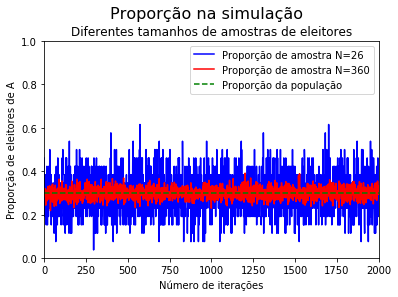

In [11]:
###
### Execução dos testes
###

# listas de proporções das amostras 1 e 2 respectivamente
amostras_1 = []
amostras_2 = []

# executamos os testes
lista_x = range(0, NUMERO_TESTES)
for teste in lista_x:
    amostras_1.append(amostrar(PARTICIPANTES_AMOSTRA_1))
    amostras_2.append(amostrar(PARTICIPANTES_AMOSTRA_2))
    
# calculamos a média de cada um
media_amostras_1 = sum(amostras_1) / len(amostras_1)
media_amostras_2 = sum(amostras_2) / len(amostras_2)

# calculamos o desvio padrão de cada um
avg_dev_amost_1 = sum( (x - media_amostras_1)**2 for x in amostras_1 ) / len(amostras_1)
avg_dev_amost_2 = sum( (x - media_amostras_2)**2 for x in amostras_2 ) / len(amostras_2)

print('Amostras 1: ', 'p^ = ', media_amostras_1, ' desvio padrão de p^ = ', avg_dev_amost_1)
print('Amostras 2: ', 'p^ = ', media_amostras_2, ' desvio padrão de p^ = ', avg_dev_amost_2)

# mostrar gráficos das amostras
plt.plot(lista_x, amostras_1, 'b-', label='Proporção de amostra N=' + str(PARTICIPANTES_AMOSTRA_1))
plt.plot(lista_x, amostras_2, 'r-', label='Proporção de amostra N=' + str(PARTICIPANTES_AMOSTRA_2))
# mostrar gráficos das constantes
plt.plot([0, NUMERO_TESTES], [PROPORCAO_A, PROPORCAO_A], 'g--', label='Proporção da população')  # gráfico para p
# definimos posição da legenda
plt.legend(loc='upper right')
# configuramos os eixos
plt.axis([0, NUMERO_TESTES, 0, 1])
# configuramos os títulos
plt.suptitle('Proporção na simulação', fontsize=16, y=1)
plt.title('Diferentes tamanhos de amostras de eleitores', fontsize=12)
plt.xlabel('Número de iterações')
plt.ylabel('Proporção de eleitores de A')

# Salvamos o gráfico em PDF
plt.savefig('grafico_proporcao_eleitores.pdf', dpi=300, format='pdf')
